# Imports

In [1]:
import LightPipes as lp
import numpy as np
import matplotlib.pyplot as plt

np.set_printoptions(precision=3, suppress=True)

# Functions

In [2]:
from modules.optics import ABCDspace, ABCDlens, beamWaist, beamRadius, intensityGauss, intensitySum, plotGauss

In [3]:
from modules.LightPipesHelpers import plotField

# Gaussian Beam Reflection

We simulate a gaussian beam that does the following:
- Propagate a certain distance $d_l$
- Pass through a thin lens of focal length $f$
- Propagate a distance $2f$
- Pass through the thin lens of focal length $f$
- Propagate the distance $d_l$

Beam properties:
- zR = 124.115m
- wavelength = 632.8nm


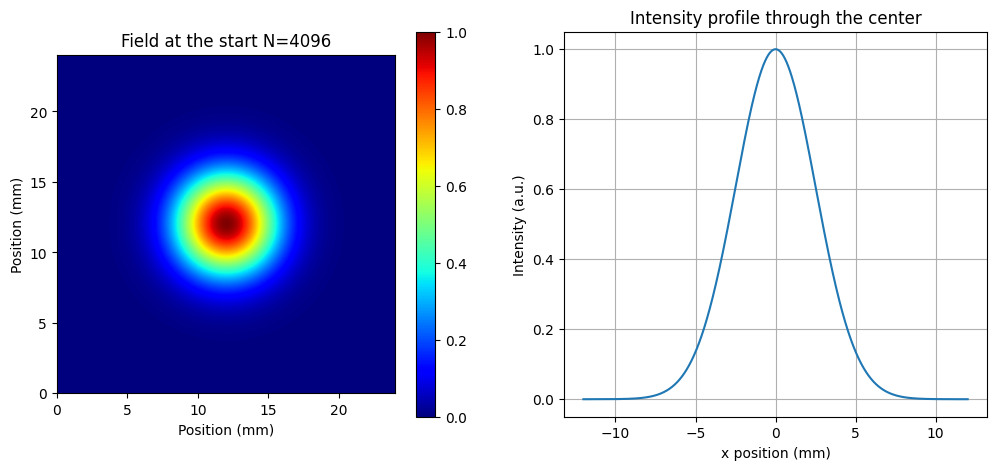

Beam waist for the graph above: w = 5.0mm


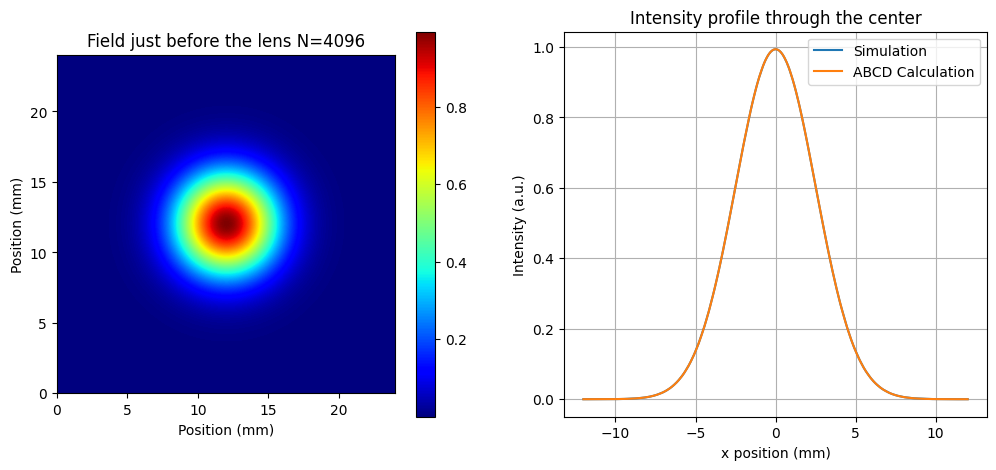

Beam waist for the graph above: w = 5.016mm


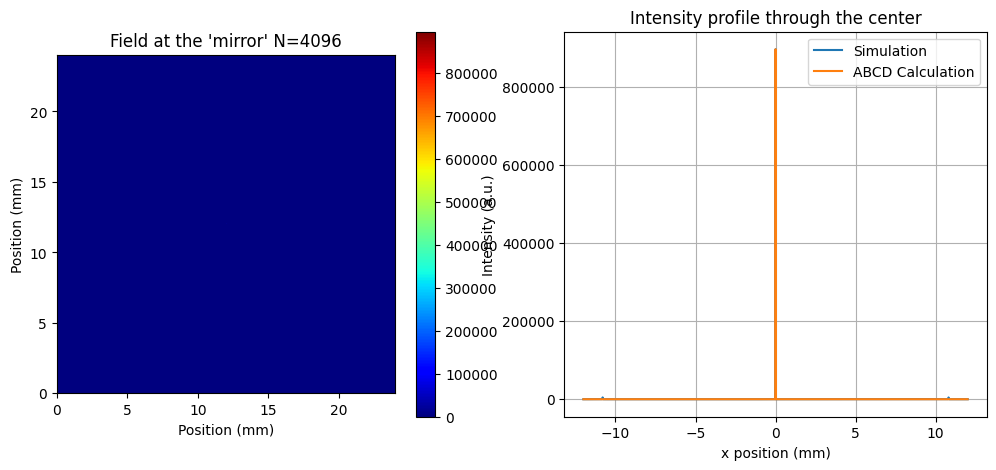

Beam waist for the graph above: w = 0.004mm


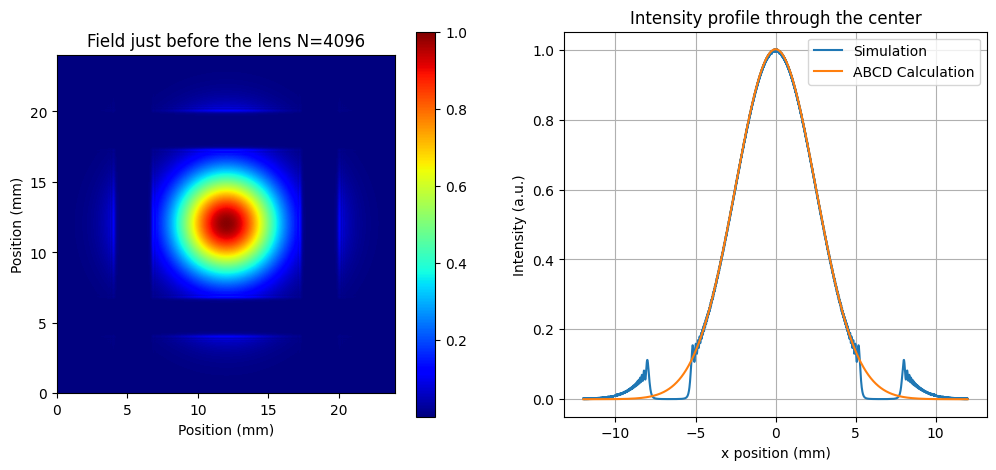

Beam waist for the graph above: w = 5.016mm


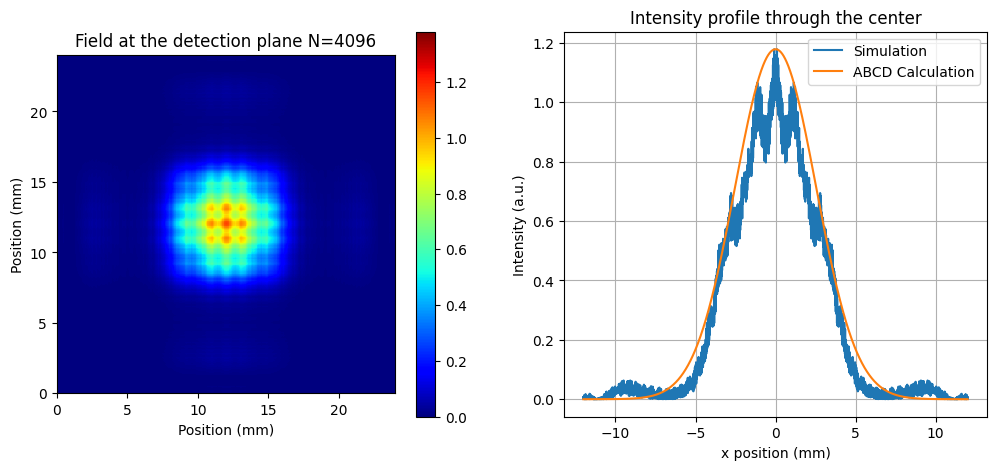

Beam waist for the graph above: w = 5.063mm


In [4]:
# Parameters
size = 24 * lp.mm # size of the grid
N = 2**12 # number (NxN) of grid pixels

# Laser Beam Settings
wave = 632.8 * lp.nm # wavelength of HeNe laser
w0 = 5 * lp.mm # laser beam waist

k = 2 * np.pi / wave
zr = np.pi * w0**2 / wave

print(f"Beam properties:")
print(f"- zR = {zr:.3f}m")
print(f"- wavelength = {wave / lp.nm}nm")


# Parameters
dl = 10 * lp.m # distance from the lens to 0
f = 0.1 * lp.m # focal length of the lens


# ABCD matrixes for: propagtion and lens
prop1 = np.array([[1, dl], [0, 1]])
prop2 = np.array([[1, f], [0, 1]])
lens = np.array([[1, 0], [-1/f, 1]])

# Range to see the beam in
xx = np.arange(N)/N * size - (size / 2)


# Create the beam
Field = lp.Begin(size, wave, N, dtype=np.complex64)
Field = lp.GaussBeam(Field, w0)
plotField(Field, title="Field at the start")
plt.show()

print(f"Beam waist for the graph above: w = {w0 / lp.mm}mm")


# Propagate the laser some distance
Field = lp.Forvard(Field, dl)
plotField(Field, title="Field just before the lens")

ABCD = prop1
plotGauss(ABCD, w0, wave, xx, np.max(lp.Intensity(Field, flag=0)[N//2]))

plt.legend()
plt.show()

print(f"Beam waist for the graph above: w = {beamWaist(ABCD, w0, wave) / lp.mm:.3f}mm")


# Pass the beam through the lens and propagate up to the focus
Field = lp.Lens(Field, f)
Field = lp.Forvard(Field, f)
plotField(Field, title="Field at the 'mirror'")

ABCD = prop2 @ (lens @ ABCD)
plotGauss(ABCD, w0, wave, xx, np.max(lp.Intensity(Field, flag=0)[N//2]))

plt.legend()
plt.show()

print(f"Beam waist for the graph above: w = {beamWaist(ABCD, w0, wave) / lp.mm:.3f}mm")


# "Reflect" the beam and propagate back to the lens
Field = lp.Forvard(Field, f)
plotField(Field, title="Field just before the lens")

ABCD = prop2 @ ABCD
plotGauss(ABCD, w0, wave, xx, np.max(lp.Intensity(Field, flag=0)[N//2]))

plt.legend()
plt.show()

print(f"Beam waist for the graph above: w = {beamWaist(ABCD, w0, wave) / lp.mm:.3f}mm")


# Propagate to the detection plane
Field = lp.Lens(Field, f)
Field = lp.Forvard(Field, dl)
plotField(Field, title="Field at the detection plane")

ABCD = prop1 @ (lens @ ABCD)
plotGauss(ABCD, w0, wave, xx, np.max(lp.Intensity(Field, flag=0)[N//2]))

plt.legend()
plt.show()

print(f"Beam waist for the graph above: w = {beamWaist(ABCD, w0, wave) / lp.mm:.3f}mm")